In [71]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [72]:
data = pd.read_csv('output/merged.csv')
data

,Unnamed: 0,2013 CBSA,CBSA Code,Population,Age Adjusted Accidental Death Rate per 100000,Census Population,Year,Smoking rate,Binge drinking rate,"Property crime rate per 100,000","Violent crime rate per 100,000"
0,0,"Akron, OH",10420.0,12625850.0,36.8,703505,2015,27.80,20.38,2541.0,277.3
1,1,"Albany-Schenectady-Troy, NY",10580.0,15466849.0,22.5,886188,2017,15.77,15.62,1954.7,291.2
2,2,"Albuquerque, NM",10740.0,15049954.0,60.7,913113,2017,16.73,14.24,5498.9,1084.9
3,3,"Allentown-Bethlehem-Easton, PA-NJ",10900.0,14352019.0,37.5,840550,2017,18.56,16.15,1667.0,237.5
4,4,"Anchorage, AK",11260.0,6547472.0,49.3,400888,2017,19.74,17.40,5441.4,1162.8
5,5,"Atlanta-Sandy Springs-Roswell, GA",12060.0,90449335.0,38.0,5882450,2017,14.93,13.61,2865.7,367.6
6,6,"Atlantic City-Hammonton, NJ",12100.0,4830144.0,44.2,269918,2012,22.00,19.30,2557.4,312.0
7,7,"Austin-Round Rock, TX",12420.0,28983975.0,39.6,2115827,2017,12.49,22.93,2344.4,306.3
8,8,"Baltimore-Columbia-Towson, MD",12580.0,48206323.0,27.3,2808175,2017,15.42,17.11,2732.9,782.5
9,9,"Baton Rouge, LA",12940.0,13890020.0,48.1,834159,2017,21.69,20.49,3937.5,546.8


In [73]:
from sklearn.preprocessing import MinMaxScaler

#Select relevant features
features = data[[
    'Age Adjusted Accidental Death Rate per 100000',
#     'Median AQI',
    'Smoking rate',
    'Binge drinking rate',
    'Property crime rate per 100,000',
    'Violent crime rate per 100,000'
]]

#Normalize data
features_normalized = (features - features.mean()) / features.std()
# mms = MinMaxScaler()
# features_normalized = pd.DataFrame(data=mms.fit_transform(features),columns=list(features))

#Multiply features negatively correlated with city safety by -1.
#This is so when we add them in, we're actually dragging the safety index down.
# airq = features_normalized[['Median AQI']]
# features_normalized.drop(columns=['Median AQI'],inplace=True)
features_normalized = features_normalized * -1

#Removed airq, add back in: airq
features_normalized = pd.concat([data['2013 CBSA'], features_normalized], axis=1)
features_normalized

,2013 CBSA,Age Adjusted Accidental Death Rate per 100000,Smoking rate,Binge drinking rate,"Property crime rate per 100,000","Violent crime rate per 100,000"
0,"Akron, OH",0.454258,-2.194985,-1.055423,0.102405,0.641371
1,"Albany-Schenectady-Troy, NY",2.095638,0.405653,0.310906,0.799204,0.568940
2,"Albuquerque, NM",-2.289028,0.198121,0.707027,-3.412965,-3.566908
3,"Allentown-Bethlehem-Easton, PA-NJ",0.373911,-0.197487,0.158773,1.141127,0.848762
4,"Anchorage, AK",-0.980515,-0.452579,-0.200032,-3.344629,-3.972832
5,"Atlanta-Sandy Springs-Roswell, GA",0.316520,0.587244,0.887864,-0.283491,0.170832
6,"Atlantic City-Hammonton, NJ",-0.395128,-0.941144,-0.745415,0.082914,0.460554
7,"Austin-Round Rock, TX",0.132869,1.114721,-1.787384,0.336058,0.490256
8,"Baltimore-Columbia-Towson, MD",1.544685,0.481316,-0.116789,-0.125662,-1.991148
9,"Baton Rouge, LA",-0.842777,-0.874129,-1.086997,-1.557291,-0.762952


In [74]:
#Run principal component analysis against data
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=False)
features_pca = pca.fit_transform(features_normalized.iloc[:,1:])

In [75]:
pca.explained_variance_ratio_

array([0.46191848, 0.20964128])

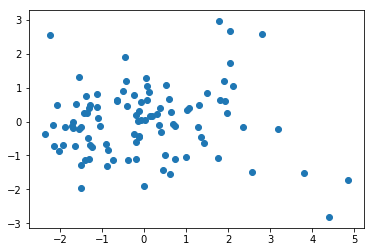

In [76]:
import matplotlib.pyplot as plt
plt.scatter(features_pca[:,0], features_pca[:,1])

How we're weighting our different values:
- 'Age Adjusted Accidental Death Rate per 100000' : medium
- 'Smoking rate' : low
- 'Binge drinking rate' : medium
- 'Property crime rate per 100,000' : high
- 'Violent crime rate per 100,000' : high
- 'Median AQI' : low

In [77]:
weights = [10,5,15,30,40]
features_normalized['Scores'] = pd.Series([100 + np.dot(weights, row[1:]) for index, row in features_normalized.iterrows()])
features_normalized['Scores'] = MinMaxScaler().fit_transform(features_normalized[['Scores']]) * 100

In [78]:
features_normalized.sort_values('Scores')

,2013 CBSA,Age Adjusted Accidental Death Rate per 100000,Smoking rate,Binge drinking rate,"Property crime rate per 100,000","Violent crime rate per 100,000",Scores
4,"Anchorage, AK",-0.980515,-0.452579,-0.200032,-3.344629,-3.972832,0.000000
2,"Albuquerque, NM",-2.289028,0.198121,0.707027,-3.412965,-3.566908,3.968847
54,"Memphis, TN-MS-AR",-0.682082,-0.523918,1.315560,-1.903373,-4.001492,14.904951
48,"Little Rock-North Little Rock-Conway, AR",-0.199999,-1.550770,-0.418185,-1.736393,-2.075043,27.223461
58,"Mobile, AL",-1.198601,-1.743170,0.365445,-2.291408,-1.139175,31.994328
9,"Baton Rouge, LA",-0.842777,-0.874129,-1.086997,-1.557291,-0.762952,37.118423
86,"Shreveport-Bossier City, LA",-0.670604,-1.591844,0.368315,-1.432383,-1.076124,39.589561
90,"Tallahassee, FL",0.144347,0.792614,-0.584671,-1.082498,-1.083940,43.116424
93,"Tucson, AZ",-0.923124,0.267298,-0.220125,-1.546238,-0.513874,43.350063
56,"Milwaukee-Waukesha-West Allis, WI",-0.693561,0.682362,-1.242001,0.096582,-1.459642,43.459814


In [79]:
print("Minimum score: ", min(features_normalized['Scores']))
print("Maximum score: ", max(features_normalized['Scores']))

Minimum score:  0.0
Maximum score:  100.0


In [80]:
data.sort_values('Violent crime rate per 100,000')

,Unnamed: 0,2013 CBSA,CBSA Code,Population,Age Adjusted Accidental Death Rate per 100000,Census Population,Year,Smoking rate,Binge drinking rate,"Property crime rate per 100,000","Violent crime rate per 100,000"
76,76,"Provo-Orem, UT",39340.0,8716146.0,35.2,617678,2017,4.20,4.77,1530.0,79.8
73,73,"Portland-South Portland, ME",38860.0,9189623.0,37.9,532083,2017,13.70,18.73,1476.9,127.4
65,65,"Ogden-Clearfield, UT",36260.0,10172408.0,35.7,666547,2017,9.51,10.73,2095.7,162.3
24,24,"Duluth, MN-WI",20260.0,5004136.0,44.7,278782,2017,21.54,23.52,3007.3,201.8
43,43,"Kennewick-Richland, WA",28420.0,4251915.0,34.9,290296,2015,13.52,18.92,2045.4,205.0
14,14,"Cedar Rapids, IA",16300.0,4545321.0,35.8,270293,2017,18.08,22.91,2410.0,217.4
64,64,"Norwich-New London, CT",35980.0,4842786.0,39.0,269033,2012,18.24,18.47,1831.7,224.5
51,51,"Madison, WI",31540.0,10617266.0,39.0,654230,2014,11.33,23.54,1826.0,228.6
79,79,"Roanoke, VA",40220.0,5436453.0,42.0,312688,2014,22.56,14.49,2389.5,229.8
74,74,"Port St. Lucie, FL",38940.0,7137653.0,47.3,473429,2017,16.42,11.94,1681.7,233.6


Um... ok. That's not really what I was expecting. This is saying that higher rates of binge drinking correlate with lower rates of accidental deaths. Uh....

In [81]:
features.corr()

,Age Adjusted Accidental Death Rate per 100000,Smoking rate,Binge drinking rate,"Property crime rate per 100,000","Violent crime rate per 100,000"
Age Adjusted Accidental Death Rate per 100000,1.000000,0.513703,-0.313361,0.488475,0.280754
Smoking rate,0.513703,1.000000,-0.002287,0.278856,0.184486
Binge drinking rate,-0.313361,-0.002287,1.000000,-0.162965,-0.071973
"Property crime rate per 100,000",0.488475,0.278856,-0.162965,1.000000,0.702706
"Violent crime rate per 100,000",0.280754,0.184486,-0.071973,0.702706,1.000000


- Not too surprising, but property crime and violent crime are strongly correlated
- Uhhhh.... apparently binge drinking is inversely correlated with accidental deaths. Uh, sure.
- I'm loathe to suggest that smoking is related to accidental death, but it's possible.
- Smoking and binge drinking are hardly related at all though.
- Property crime is correlated with accidental death, but I just don't see causation here.


Ok, now we're going to see if we can draw a line from violent crime to poverty (hint: we will). I'm going to pull in the full dataset since we'll get better coverage instead of merging with the item list.

In [82]:
#First, cut down the number of rows in the crime dataset
crime = pd.read_excel('data/crime/table-6.xls', header=3)
crime = crime.iloc[:2331,:]

#Extract the indices of rows that have the metro name
metro_indices = crime[pd.notnull(crime['Metropolitan Statistical Area'])].index

#Find the rate per 100,000 for each metro area
final_metro_indices = []
violent_crime_rate = []
property_crime_rate = []
for x in range(len(metro_indices)):
    #Get metro index in dataframe, figure out where to stop looking for the rate
    index = metro_indices[x]
    next_index = metro_indices[x + 1] if not x == (len(metro_indices) - 1) else len(crime)
    
    #Search the bounded range for the rate
    for rate_index in range(index, next_index):
        row = crime.iloc[rate_index, :]
        if row['Counties/principal cities'] == 'Rate per 100,000 inhabitants' and not np.isnan(row['Violent\ncrime']) and not np.isnan(row['Property\ncrime']):
            final_metro_indices.append(index)
            violent_crime_rate.append(row['Violent\ncrime'])
            property_crime_rate.append(row['Property\ncrime'])
            break

#Sanity check on the number of values for indices and crime rates
assert(len(final_metro_indices) == len(violent_crime_rate))
assert(len(violent_crime_rate) == len(property_crime_rate))

#Strip down the metro names so that we can match against the merged dataframe
metro_names = []
for index in final_metro_indices:
    name = crime.iloc[index,:]['Metropolitan Statistical Area']
    name = name.split(' M.S.A.')[0]
    metro_names.append(name)

#Build the dataframe for 
crime_df = pd.DataFrame(data={
    '2013 CBSA' : metro_names,
    'Violent crime rate per 100,000' : violent_crime_rate,
    'Property crime rate per 100,000' : property_crime_rate
})
crime_df

,2013 CBSA,"Property crime rate per 100,000","Violent crime rate per 100,000"
0,"Akron, OH",2541.0,277.3
1,"Albany, GA",3937.1,726.6
2,"Albany, OR",2547.3,158.0
3,"Albany-Schenectady-Troy, NY",1954.7,291.2
4,"Albuquerque, NM",5498.9,1084.9
5,"Alexandria, LA",4763.9,729.0
6,"Allentown-Bethlehem-Easton, PA-NJ",1667.0,237.5
7,"Altoona, PA",1419.5,202.7
8,"Amarillo, TX",3588.4,634.1
9,"Ames, IA",1934.7,181.2


In [98]:
poverty = pd.read_csv('data/poverty/ACS_17_1YR_S1703_with_ann.csv', 
  header=1,
  usecols=[
      'Geography', 
      'Less than 100 percent of the poverty level; Estimate; Population for whom poverty status is determined',
      'Less than 50 percent of the poverty level; Estimate; Population for whom poverty status is determined',
      'Less than 125 percent of the poverty level; Estimate; Population for whom poverty status is determined'
  ])
poverty.rename(columns={
    'Geography' : '2013 CBSA',
    'Less than 100 percent of the poverty level; Estimate; Population for whom poverty status is determined' : 'Percent below poverty level'
}, inplace=True)
poverty['2013 CBSA'] = poverty['2013 CBSA'].apply(lambda x: x.split(' Metro Area')[0])
poverty

,2013 CBSA,Less than 50 percent of the poverty level; Estimate; Population for whom poverty status is determined,Percent below poverty level,Less than 125 percent of the poverty level; Estimate; Population for whom poverty status is determined
0,"Akron, OH",5.9,12.5,16.6
1,"Albany-Schenectady-Troy, NY",5.1,10.4,13.6
2,"Albuquerque, NM",7.2,15.5,20.3
3,"Allentown-Bethlehem-Easton, PA-NJ",5.4,11.2,14.6
4,"Atlanta-Sandy Springs-Roswell, GA",5.2,12.0,16.8
5,"Augusta-Richmond County, GA-SC",7.2,15.5,20.0
6,"Austin-Round Rock, TX",5.2,10.4,13.5
7,"Bakersfield, CA",9.8,21.4,28.9
8,"Baltimore-Columbia-Towson, MD",5.1,10.2,12.9
9,"Baton Rouge, LA",7.8,16.3,20.2


In [99]:
poverty_crime = poverty.merge(crime_df, on='2013 CBSA', how='inner')
poverty_crime.corr()

,Less than 50 percent of the poverty level; Estimate; Population for whom poverty status is determined,Percent below poverty level,Less than 125 percent of the poverty level; Estimate; Population for whom poverty status is determined,"Property crime rate per 100,000","Violent crime rate per 100,000"
Less than 50 percent of the poverty level; Estimate; Population for whom poverty status is determined,1.000000,0.955784,0.931027,0.307598,0.333691
Percent below poverty level,0.955784,1.000000,0.992179,0.312236,0.347427
Less than 125 percent of the poverty level; Estimate; Population for whom poverty status is determined,0.931027,0.992179,1.000000,0.327414,0.358760
"Property crime rate per 100,000",0.307598,0.312236,0.327414,1.000000,0.677922
"Violent crime rate per 100,000",0.333691,0.347427,0.358760,0.677922,1.000000


Ok, so not a huge correlation between poverty and property or violent crime, but some.

In [120]:
employment = pd.read_csv('data/employment/ACS_17_1YR_S2301_with_ann.csv', header=1,
  usecols=[
    'Geography', 
    'Unemployment rate; Estimate; Population 16 years and over'
  ])
employment.rename(columns={
    'Geography' : '2013 CBSA',
    'Unemployment rate; Estimate; Population 16 years and over' : 'Unemployment rate'
}, inplace=True)

employment['2013 CBSA'].replace(regex=True,inplace=True,to_replace=r' Metro Area',value=r'')
employment = employment.loc[
    ~(employment['Unemployment rate'] == 'N')
]
#  = poverty['2013 CBSA'].apply(lambda x: x.split(' Metro Area')[0])
employment['Unemployment rate'] = pd.to_numeric(employment['Unemployment rate'])
employment

,2013 CBSA,Unemployment rate
0,"Abilene, TX",3.9
1,"Akron, OH",5.2
2,"Albany, GA",10.5
3,"Albany, OR",8.7
4,"Albany-Schenectady-Troy, NY",5.2
5,"Albuquerque, NM",5.3
6,"Alexandria, LA",7.2
7,"Allentown-Bethlehem-Easton, PA-NJ",5.6
8,"Altoona, PA",5.3
9,"Amarillo, TX",3.6


In [121]:
employment_crime = employment.merge(crime_df, on='2013 CBSA', how='inner')
employment_crime.corr()

,Unemployment rate,"Property crime rate per 100,000","Violent crime rate per 100,000"
Unemployment rate,1.000000,0.315557,0.373544
"Property crime rate per 100,000",0.315557,1.000000,0.638119
"Violent crime rate per 100,000",0.373544,0.638119,1.000000


Again, moderate correlation with unemployment.